In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import japanize_matplotlib

[0.1, 0.4, 0.6, 0.9]


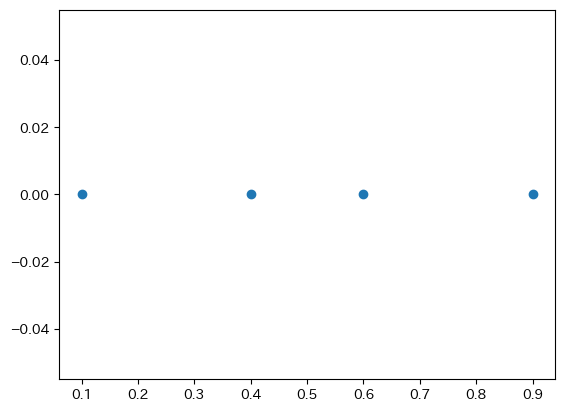

In [3]:
X = [0.1, 0.4, 0.6, 0.9]
Y = [0, 0, 0, 0]

print(X)

plt.scatter(X, Y)

In [38]:
data = pd.read_excel("domestic.xlsx")
data

,調査,賛成,どちらかといえば賛成,どちらかといえば反対,反対,わからない
0,1979年5月調査,29.1,41.0,18.3,4.5,7.1
1,1992年11月調査,19.8,35.8,26.4,11.9,6.1
2,1997年9月調査,17.9,34.0,26.9,16.7,4.6
3,2002年7月調査,12.8,30.5,29.4,21.7,5.6
4,2004年11月調査,11.0,30.2,29.5,24.2,5.0
5,2007年8月調査,12.0,27.8,30.7,26.2,3.2
6,2009年10月調査,9.5,27.8,32.0,26.6,4.0
7,2012年10月調査,12.4,36.0,30.4,18.4,2.8
8,2014年8月調査,11.2,32.0,34.2,17.4,5.1
9,2016年9月調査,8.3,28.7,37.0,21.5,4.5


In [5]:
data.columns

Index(['調査', '賛成', 'どちらかといえば賛成', 'どちらかといえば反対', '反対', 'わからない'], dtype='object')

In [21]:
a = data[['調査', '賛成', 'どちらかといえば賛成', 'どちらかといえば反対', '反対']]
a

,調査,賛成,どちらかといえば賛成,どちらかといえば反対,反対
0,1979年5月調査,29.1,41.0,18.3,4.5
1,1992年11月調査,19.8,35.8,26.4,11.9
2,1997年9月調査,17.9,34.0,26.9,16.7
3,2002年7月調査,12.8,30.5,29.4,21.7
4,2004年11月調査,11.0,30.2,29.5,24.2
5,2007年8月調査,12.0,27.8,30.7,26.2
6,2009年10月調査,9.5,27.8,32.0,26.6
7,2012年10月調査,12.4,36.0,30.4,18.4
8,2014年8月調査,11.2,32.0,34.2,17.4
9,2016年9月調査,8.3,28.7,37.0,21.5


In [7]:
dat = a.T
dat

,0,1,2,3,4,5,6,7,8,9,10
調査,1979年5月調査,1992年11月調査,1997年9月調査,2002年7月調査,2004年11月調査,2007年8月調査,2009年10月調査,2012年10月調査,2014年8月調査,2016年9月調査,2019年9月調査
賛成,29.1,19.8,17.9,12.8,11.0,12.0,9.5,12.4,11.2,8.3,6.5
どちらかといえば賛成,41.0,35.8,34.0,30.5,30.2,27.8,27.8,36.0,32.0,28.7,24.6
どちらかといえば反対,18.3,26.4,26.9,29.4,29.5,30.7,32.0,30.4,34.2,37.0,38.5
反対,4.5,11.9,16.7,21.7,24.2,26.2,26.6,18.4,17.4,21.5,24.9


In [23]:
perc = [dat[i].to_list()[1:] for i in range(0, 11)]
perc

[[29.1, 41.0, 18.3, 4.5],
 [19.8, 35.8, 26.4, 11.9],
 [17.9, 34.0, 26.9, 16.7],
 [12.8, 30.5, 29.4, 21.7],
 [11.0, 30.2, 29.5, 24.2],
 [12.0, 27.8, 30.7, 26.2],
 [9.5, 27.8, 32.0, 26.6],
 [12.4, 36.0, 30.4, 18.4],
 [11.2, 32.0, 34.2, 17.4],
 [8.3, 28.7, 37.0, 21.5],
 [6.5, 24.6, 38.5, 24.9]]

In [40]:
pot = []

for i in range(len(perc)):
    pot.append([-10*np.log(perc[i][j]/95) for j in range(4)])

pot

[[11.83138717423094, 8.40304824896233, 16.469758317531657, 30.497994948242667],
 [15.681949539000513,
  9.759289981938862,
  12.805128814482705,
  20.773384914830572],
 [16.690761787538314,
  10.275163669843794,
  12.617506049927474,
  17.384681721778314],
 [20.044317206749692,
  11.361502079871748,
  11.72882217255905,
  14.76564631054127],
 [21.5598161880217, 11.46034967219717, 11.694866282547666, 13.675242584379001],
 [20.689702418125403,
  12.288408709039496,
  11.296142370073895,
  12.881174808334897],
 [23.025850929940454,
  12.288408709039496,
  10.881409888008143,
  12.729656758128874],
 [20.361804189895494,
  9.703579531444309,
  11.394342831883648,
  16.41526226985601],
 [21.37963113299492,
  10.881409888008143,
  10.216512475319812,
  16.974066853800576],
 [24.376213767979884,
  11.969797688349654,
  9.429589789563163,
  14.858239564669237],
 [26.820747146989493,
  13.511304486622237,
  9.032186503068024,
  13.39009088129879]]

[0.1, 0.4, 0.6, 0.9] [0, 0, 0, 0] [29.1, 41.0, 18.3, 4.5]


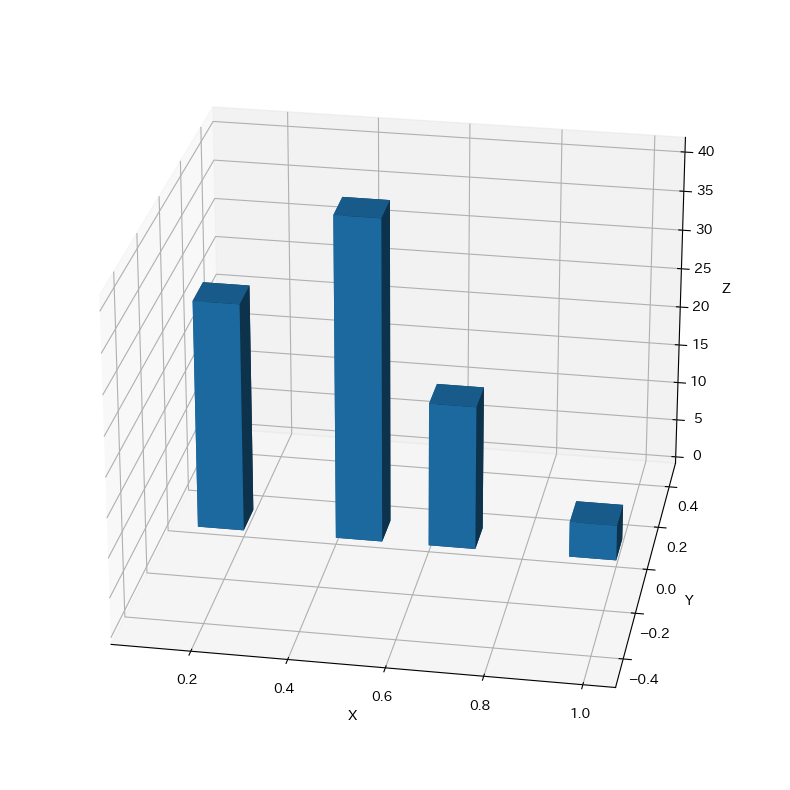

In [41]:
# set up the figure and axes
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')

# bar graph code
x, y, z = X, Y, dat[0].to_list()[1:]
print(x, y, z)
top = z
bottom = np.zeros_like(top)
width = 0.1
depth = 0.1
ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.view_init(elev= 25, azim=280, roll=0)

ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")

plt.ylim(-0.5, 0.5)

# ax2 = fig.add_subplot(252, projection='3d')

# # bar graph code
# x, y, z = X, Y, dat[1].to_list()[1:]
# print(x, y, z)
# top = z
# bottom = np.zeros_like(top)
# width = 0.1
# depth = 0.1
# ax2.bar3d(x, y, bottom, width, depth, top, shade=True)
# # ax2.set_title('支持者数')
# ax2.view_init(elev= 25, azim=280, roll=0)

# ax2.set_xlabel("X")
# ax2.set_ylabel("Y")
# ax2.set_zlabel("Z")

# plt.ylim(-0.5, 0.5)



plt.show()

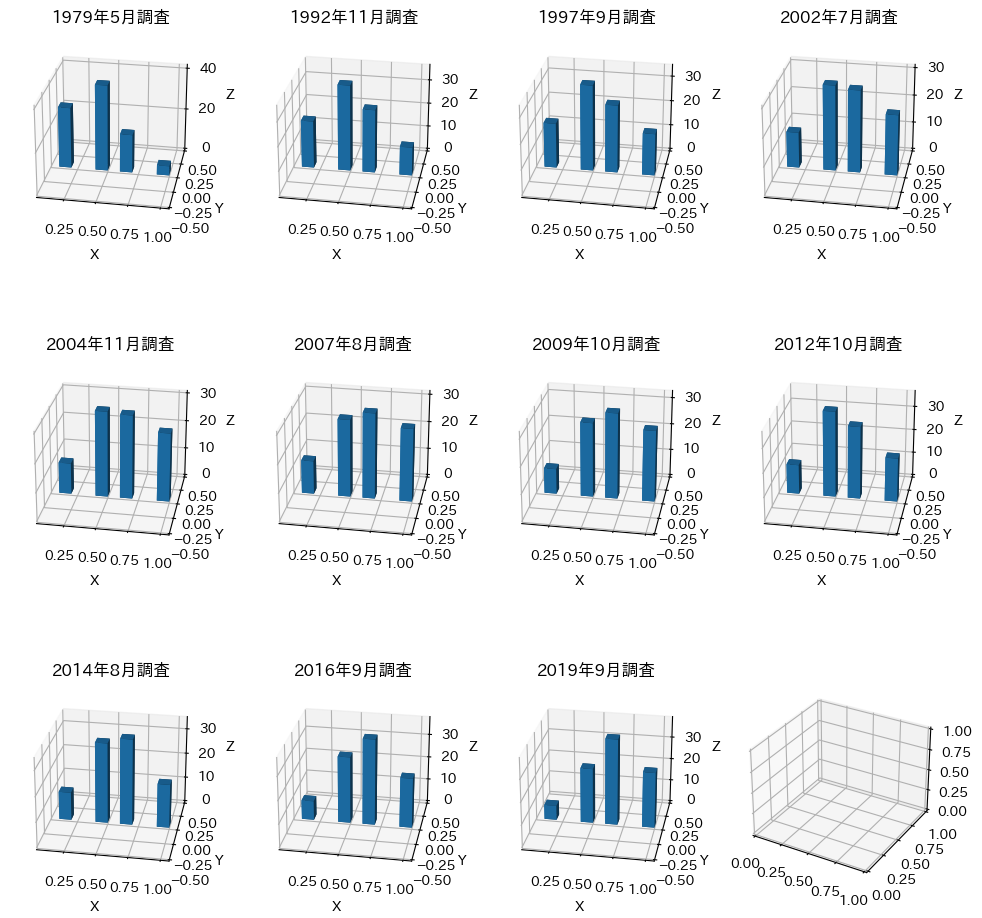

In [42]:
fig, axes = plt.subplots(3, 4, figsize=(12,12), subplot_kw={'projection': '3d'})

h = 0

for i in range(3):
    for j in range(4):
        x, y, z = X, Y, dat[h].to_list()[1:]
        
        top = z
        bottom = np.zeros_like(top)
        width = 0.1
        depth = 0.1
        axes[i][j].bar3d(x, y, bottom, width, depth, top, shade=True)
        axes[i][j].set_title(dat[h].to_list()[0])
        h += 1

        axes[i][j].set_ylim(-0.5, 0.5)

        axes[i][j].view_init(elev= 25, azim=280, roll=0)

        axes[i][j].set_xlabel("X")
        axes[i][j].set_ylabel("Y")
        axes[i][j].set_zlabel("Z")

        if h == 11:
            break

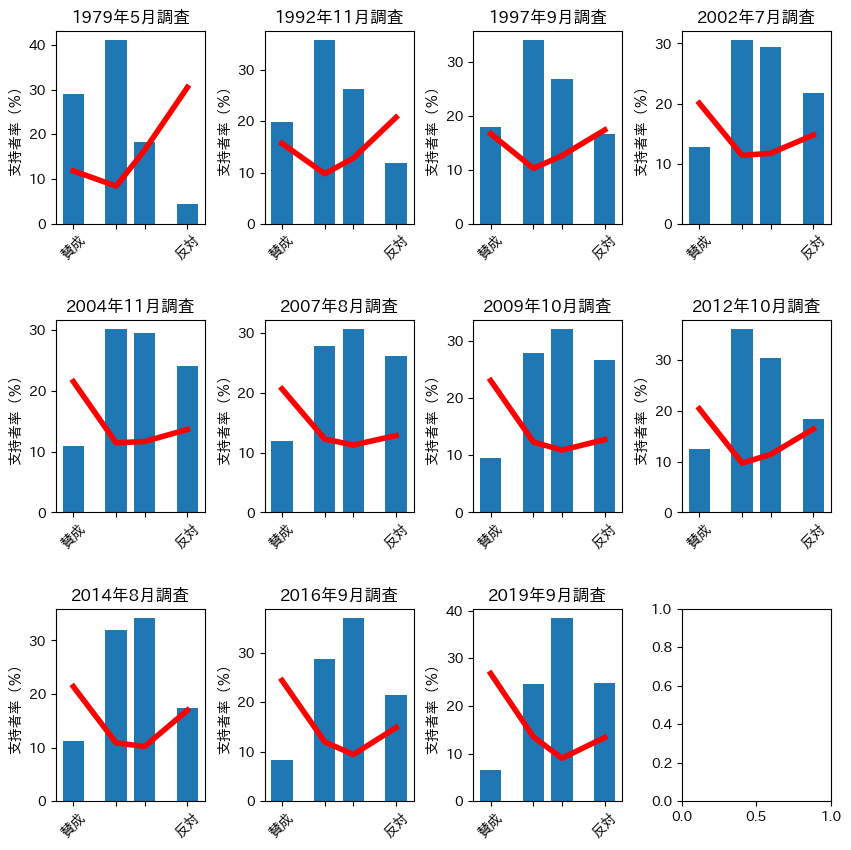

In [54]:
fig, axes = plt.subplots(3, 4, figsize=(10,10)) #, subplot_kw={'projection': '3d'})
plt.subplots_adjust(wspace=0.4, hspace=0.5)

h = 0

for i in range(3):
    for j in range(4):
        x, y = X, dat[h].to_list()[1:]
        l = pot[h]
        # print(x, y)
        
        axes[i][j].bar(x, y, width=0.15)
        axes[i][j].plot(x, l, linewidth=4, color="red")

        axes[i][j].set_title(dat[h].to_list()[0])
        h += 1

        axes[i][j].set_xticks([0.1, 0.4, 0.6, 0.9])
        axes[i][j].set_xticklabels(['賛成', '', '', '反対'], rotation=45)

        # axes[i][j].set_xlabel("")
        axes[i][j].set_ylabel("支持者率（％）")

        if h == 11:
            break

plt.savefig("domestic.png")